Работа на уроке с преподавателем по теме "Сегментация сцены на основе простейших подходов"

In [5]:
# Подключение внешних модулей
import cv2
import numpy as np
import matplotlib.pyplot as plt

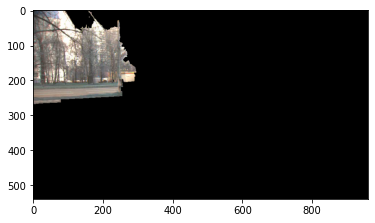

In [6]:
# чтение одной картинки
path_to_avi = 'C:/Users/89263/Desktop/data/city/trm.169.008.avi'
cap = cv2.VideoCapture(path_to_avi)
_, frame = cap.read()

mask = np.zeros(frame.shape[:2], np.uint8)   # img.shape[:2] = (413, 620)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (0, 0, 300, 300)

# this modifies mask 
cv2.grabCut(frame, mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# If mask==2 or mask== 1, mask2 get 0, other wise it gets 1 as 'uint8' type.
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# adding additional dimension for rgb to the mask, by default it gets 1
# multiply it with input image to get the segmented image
img_cut = frame*mask2[:,:,np.newaxis]

plt.imshow(img_cut)
plt.show()

In [7]:
from graph import build_graph, segment_graph
from random import random
import numpy as np

In [16]:

def diff(img, x1, y1, x2, y2):
    _out = np.sum((img[x1, y1] - img[x2, y2]) ** 2)
    return np.sqrt(_out)

def threshold(size, const):
    return (const * 1.0 / size)

def generate_image(frame, forest, width, height):
    random_color = lambda: (int(random()*255), int(random()*255), int(random()*255))
    colors = [random_color() for i in range(width*height)]

    im = np.zeros_like(frame)
    print(forest)

    for y in range(height):
        for x in range(width):
            comp = forest.find(y * width + x)
            im[x, y] = colors[comp]

    return im #img.transpose(Image.ROTATE_270).transpose(Image.FLIP_LEFT_RIGHT)

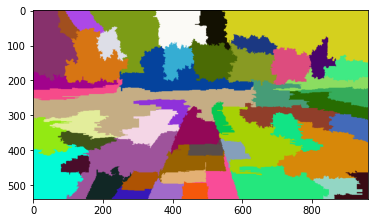

(<matplotlib.image.AxesImage at 0x2c759a61720>, None)

In [17]:
sigma = 1.0
neighbor = 8
K = 10.0
min_comp_size = 2000

size = frame.shape  # (height, width) 

# Gaussian Filter
# smooth = image_file.filter(ImageFilter.GaussianBlur(sigma))
# smooth = np.array(smooth).astype(int)
    
# "Creating graph..."
graph_edges = build_graph(frame, size[0], size[1], diff, neighbor==8)
    
# "Merging graph..."
forest = segment_graph(graph_edges, size[0]*size[1], K, min_comp_size, threshold)

# "Visualizing segmentation and saving into: {}".format(output_file)
image = generate_image(frame, forest, size[0], size[1])
plt.imshow(image), plt.show()

[Efficient Graph-Based Image Segmentation](http://www.cs.brown.edu/~pff/segment/)